In [2]:
# Basic Import
import matplotlib.pyplot as plt
import seaborn as sns
# Modeling
from sklearn.metrics import f1_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [3]:
#Spliting Independent and Dependent Columns
df=pd.read_csv("train_data_v2.csv")
X=df.drop(['Made_Purchase'],axis=1)
y=df['Made_Purchase']

In [4]:
#Top 5 Rows of Independent columns
X.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,4.0,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,3.0,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,2.0,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0


In [5]:
X.select_dtypes(include="object").columns

Index(['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status'],
      dtype='object')

In [6]:
#Top 5 rows of Dependent Column
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Made_Purchase, dtype: bool

In [7]:
print(X["CustomerType"].value_counts())
print(X["Gender"].value_counts())
print(X["Cookies Setting"].value_counts())
print(X["Education"].value_counts())
print(X["Month_SeasonalPurchase"].value_counts())

Returning_Visitor    12550
New_Visitor           1925
Other                  112
Name: CustomerType, dtype: int64
Not Specified    4971
Female           4829
Male             4786
Name: Gender, dtype: int64
Deny        4964
Required    4867
ALL         4756
Name: Cookies Setting, dtype: int64
Others           3726
Graduate         3691
Diploma          3653
Not Specified    3525
Name: Education, dtype: int64
May     4121
Nov     3439
Mar     2300
Dec     2013
Oct      628
Sep      519
Aug      510
Jul      487
June     349
Feb      221
Name: Month_SeasonalPurchase, dtype: int64


In [8]:
#Checking Null Values
X.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
dtype: int64

In [9]:
#Checking null value and Datatypes of Columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

**We can see that almost each column has null values**

In [10]:
#Let's see some statistics
df.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


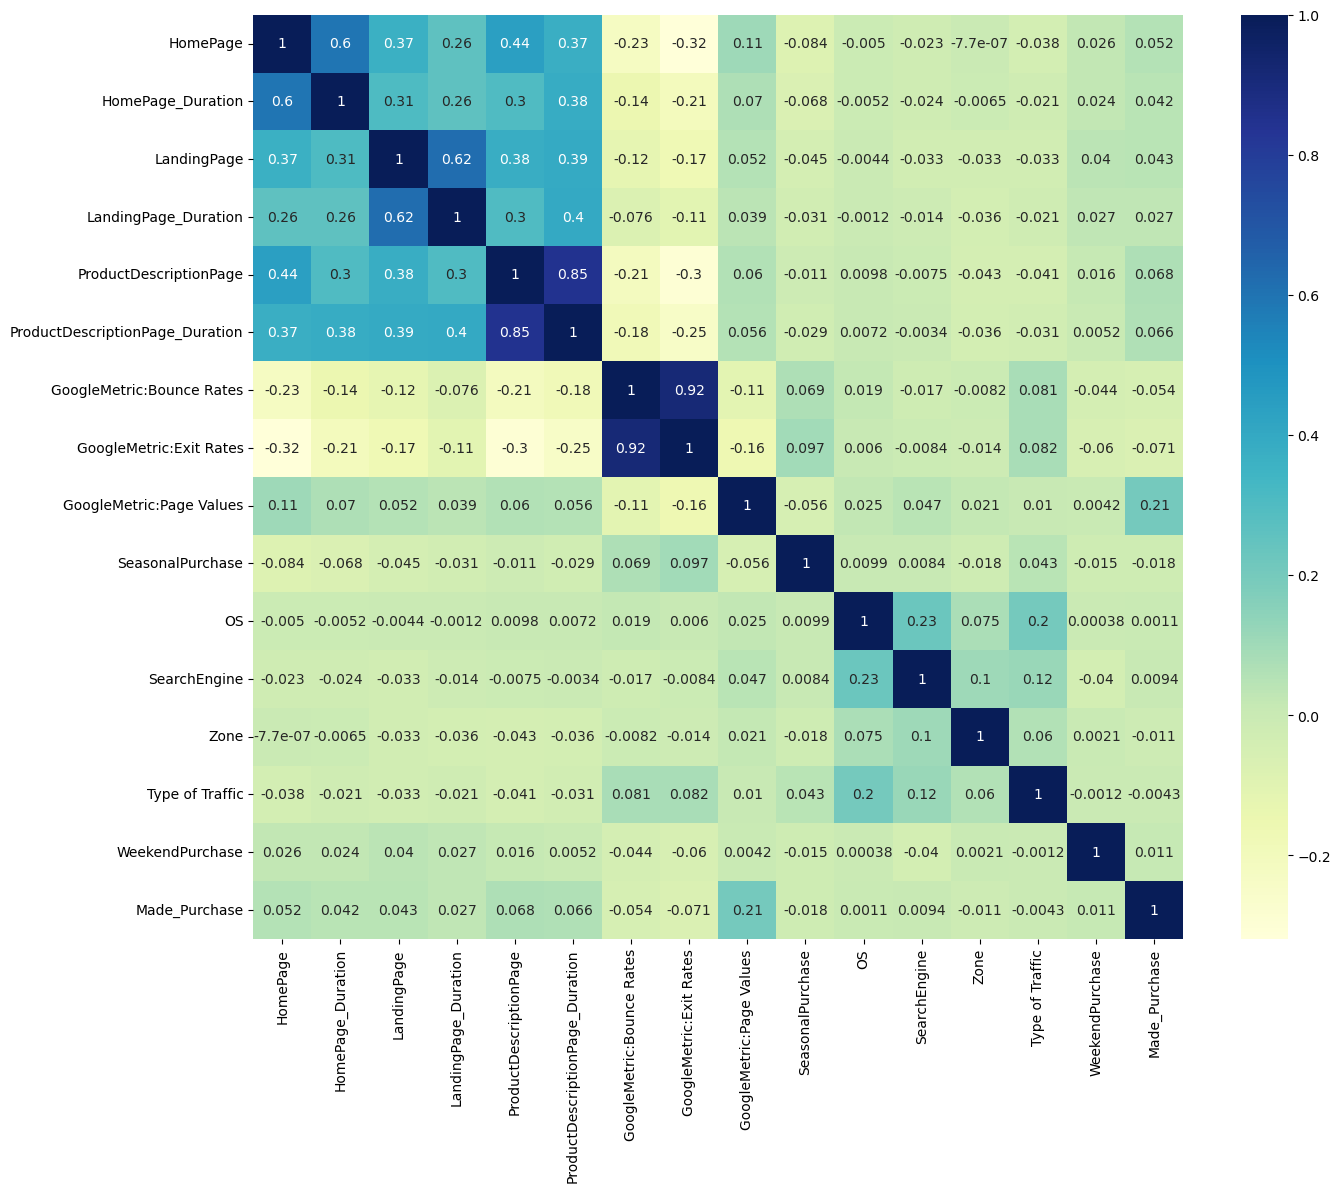

In [11]:
plt.figure(figsize=(15,12))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu",annot=True)
plt.show()

In [12]:
#Spliting Numerical and Categorical Features
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

#Data Preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
num_pipe= make_pipeline(SimpleImputer(strategy="mean"),StandardScaler())
cat_pipe= make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore"))
pre_pro=ColumnTransformer([("num",num_pipe,num_features),("cat",cat_pipe,cat_features)],remainder="passthrough")
X=pre_pro.fit_transform(X)

In [13]:
X.shape

(14731, 41)

In [14]:
# Label Preprocessing
from sklearn.preprocessing import LabelEncoder
la_en=LabelEncoder()
y=la_en.fit_transform(y)

In [15]:
#Ploting Pair Plot
#sns.pairplot(df, hue ='Made_Purchase')
#plt.show()

***Random Forest Classifier***

In [16]:
# Number of trees in random forest
#n_estimators = [int(x) for x in range(800,3000)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [1,2,3,4,5,6]
# Minimum number of samples required to split a node
#min_samples_split = [int(x) for x in range(1,300)]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [int(x) for x in range(1,300)]
# Method of selecting samples for training each tree
#bootstrap = [True, False]

In [17]:
# Create the param grid
#param_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               #'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap}
#print(param_grid)

In [18]:
ran=RandomForestClassifier()

In [19]:
#from sklearn.model_selection import RandomizedSearchCV
#rt = RandomizedSearchCV(ran,param_grid,cv=10, verbose=False,n_jobs=2)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# Define AdaBoost classifier
adaboost = AdaBoostClassifier()

# Define the grid of hyperparameters to search over
param_grid = {
    'n_estimators': [150,200,250,300],
    'learning_rate': [1,1.2,1.3,1.4,1.5]
}

# Define the GridSearchCV object
rt = GridSearchCV(adaboost, param_grid=param_grid, cv=5, n_jobs=1, scoring='f1')

In [21]:
rt.fit(X,y)
r_pred=rt.predict(X)
r_accuracy=accuracy_score(y,r_pred)
fr=f1_score(y,r_pred,average="micro")

In [22]:
#rt.best_params_

In [23]:
#Finding Accuracy and F1 Score on training data
r_accuracy=accuracy_score(y,r_pred)
fr=f1_score(y,r_pred,average="micro")
print("Accuracy on training data is:",r_accuracy)
print("F1 Score of model on training data is:",fr)

Accuracy on training data is: 0.6743601927907135
F1 Score of model on training data is: 0.6743601927907135


In [24]:
# test data transformation
test_df=pd.read_csv("test_data_v2.csv")
test_in=pre_pro.fit_transform(test_df)
pred=rt.predict(test_in)

In [25]:
submission=pd.DataFrame(columns=['id', 'Made_Purchase'])
submission['id']=[i for i in range(len(pred))]
pred_list=[]
for j in pred:
    if j==1:
        pred_list.append(True)
    else:
        pred_list.append(False)
submission["Made_Purchase"]=pred_list
submission.to_csv('submission.csv',index=False)